Conventions <br>
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha\_u},\quad 
\alpha_* \rightarrow \texttt{alpha\_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha\_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha\_fp} $ <br>

In [1]:
# imports
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\Users\Stijn Hennissen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Beta functions
$$ \beta_u = 2u-\frac{3u^3}{2\pi (v+u)^3},\quad \beta_v = -\frac{u^2(7v+u)}{r\pi (v+u)^3} $$

In [2]:
# beta functions
def beta(u, v):
    return np.array([2*u - 3*u**3 / (2*math.pi*(v + u)**3), -u**2*(7*v + u) / (4*math.pi*(v + u)**3)])

NGFP
$$ (u_*,v_*) = (\frac{343}{288\pi},-\frac{49}{288\pi}) $$

In [3]:
# NGFP (beta functions = 0)
fp = np.array([343/(288*math.pi), -49/(288*math.pi)])

Stability coefficients
$$ \theta_1 = \frac{1}{3}(1+\sqrt{43}),\quad \tilde{\theta}_1 = \frac{1}{3}(1-\sqrt{43}) $$

In [4]:
# stability coefficients (eigenvalues)
theta1 = 1/3*(1 + 43**0.5)
Theta1 = 1/3*(1 - 43**0.5)

Eigenvectors
$$ V_1 = \Big( \frac{1}{21}(8+\sqrt{43}),1 \Big)^T,\quad \tilde{V}_1 = \Big( \frac{1}{21}(8-\sqrt{43}),1 \Big)^T $$

In [5]:
# eigenvectors
ev1 = np.array([1/21*(8 + 43**0.5),1]).transpose()
Ev1 = np.array([1/21*(8 - 43**0.5),1]).transpose()

Linear generating function
$$ F^*(u,v) = (172-137\sqrt{43})u + (215+44\sqrt{43})v + \frac{49(1003\sqrt{43}-989)}{288\pi} $$

In [6]:
# linear generating function
def F_fp(u,v):
    return (172 - 137*43**0.5)*u + (215 + 137*43**0.5)*v + 49*(1003*43**0.5 - 989)/(288*math.pi)

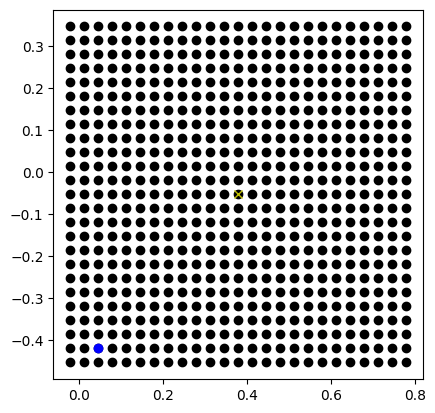

In [7]:
# generate grid of colocation points
nu, nv = (25, 25)
u = np.linspace(fp[0]-0.4, fp[0]+0.4, nu)
v = np.linspace(fp[1]-0.4, fp[1]+0.4, nv)
ug, vg = np.meshgrid(u, v)

# smoothness factor
sigma = 0.8/nu

# highlight test
hl = np.array([1,2])

# plot colocation points
fig_grid = plt.figure()
ax_grid = fig_grid.add_subplot()
plt.plot(ug, vg, marker='o', color='k', linestyle='none')
plt.plot(fp[0], fp[1], marker='x', color='y')
plt.plot(ug[hl[0],hl[1]], vg[hl[0],hl[1]], marker='o', color='b')
ax_grid.set_aspect('equal', adjustable='box')
plt.show()

Basis functions (Multivariate Cauchy Distributions)
$$ \psi_i(u,v) = \Bigg( 1 + \sum_{\alpha}\frac{(u^{\alpha}-u^{\alpha}_{c,i})^2}{\sigma^2} + \sum_{\mu}\frac{(v^{\mu}-v^{\mu}_{c,i})^2}{\sigma^2} \Bigg)^{-1} $$

In [8]:
# generate one basis function per colocation point
N_p = nu*nv

def idToCoord(id):
    # maps a collocation point id [0,...,N_p-1] to the coordinate on the grid
    return np.array([int(id%nu), int((id-(id%nu))/nu)])

def psi(i, u, v):
    # basis function for the i'th colocation point
    I = idToCoord(i)
    return 1/(1 + (u - ug[I[0],I[1]])**2/sigma**2 + (v - vg[I[0],I[1]])**2/sigma**2)

#plt.figure()
#sns.heatmap(np.array([[psi(i+nu*j, fp[0], fp[1]) for i in range(0,nu)] for j in range(0,nv)]))

$$ \frac{\partial \psi_i}{\partial u^{\alpha}} = -2 \psi_i(u,v)^2 \sum_{\alpha} (u^{\alpha}-u^{\alpha}_{c,i}),\quad \frac{\partial \psi_i}{\partial v^{\mu}} = -2 \psi_i(u,v)^2 \sum_{\mu} (v^{\mu}-v^{\mu}_{c,i}) \quad ????????$$

In [9]:
# calculate derivatives of basis functions
def dpsi(i, u, v):
    # derivative of basis function for the i'th colocation point
    I = idToCoord(i)
    return np.array([ -2*(u - ug[I[0],I[1]])*psi(i, u, v)**2, -2*(v - vg[I[0],I[1]])*psi(i, u, v)**2 ])

#sns.heatmap(np.array([[dpsi(i+nu*j, fp[0], fp[1])[0] for i in range(0,nu)] for j in range(0,nv)]))
#plt.figure()
#sns.heatmap(np.array([[dpsi(i+nu*j, fp[0], fp[1])[1] for i in range(0,nu)] for j in range(0,nv)]))

Generating function
$$ F_{\mu}(u,v) = \sum_{i=1}^{\infty} p_{\mu,i} \psi_i(u,v) $$

Master equation
$$ \sum_{\alpha} \frac{\partial F_{\mu}}{\partial u^{\alpha}} \beta^{\alpha} + \sum_{\nu} \frac{\partial F_{\mu}}{\partial v^{\nu}} \beta^{\nu} \Bigg\rvert_{(u^{\alpha}_{c,i},v^{\nu}_{c,i})} = 0 $$

In [18]:
# write master equation in terms of derivatives of basis functions
p = np.random.rand(N_p)

# precalculate dpsi; dpsi for i'th colocation point evaluated at j'th
pc_dpsi = np.zeros((N_p,N_p,2))
for i in range(0,N_p):
    for j in range(0,N_p):
        J = idToCoord(j)
        pc_dpsi[i,j] = dpsi(i,ug[J[0],J[1]],vg[J[0],J[1]])

# precalculate psi; psi for i'th colocation point evaluated at j'th
pc_psi = np.zeros((N_p,N_p))
for i in range(0,N_p):
    for j in range(0,N_p):
        J = idToCoord(j)
        pc_psi[i,j] = psi(i,ug[J[0],J[1]],vg[J[0],J[1]])

<AxesSubplot:>

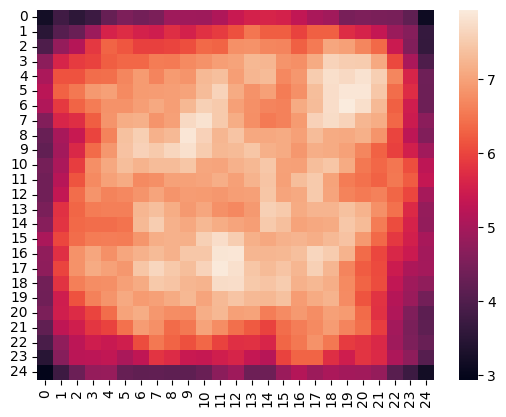

In [19]:
def F(i):
    # generating function evaluated at i'th colocation point
    value = np.array(0.0)
    for j in range(0,N_p):
        value += p[j]*pc_psi[j][i]
    return value

def F2(u,v):
    # generating function evaluated at (u,v)
    value = np.array(0.0)
    for j in range(0,N_p):
        value += p[j]*psi(j,u,v)
    return value

plt.figure()
sns.heatmap(np.array([[F(i+nu*j) for i in range(0,nu)] for j in range(0,nv)]))

<AxesSubplot:>

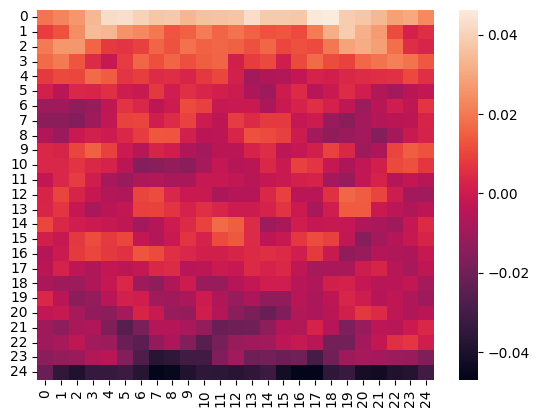

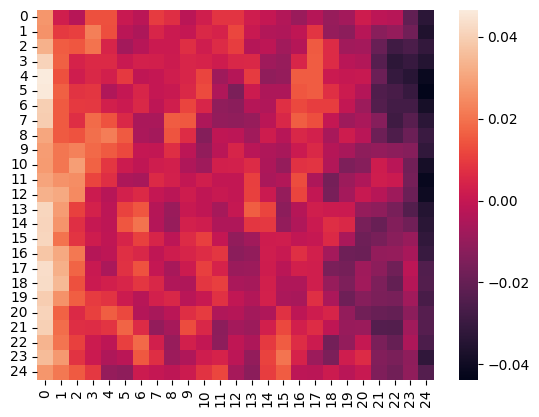

In [20]:
def dF(i):
    # derivative of generating function evaluated at i'th colocation point
    value = np.array([0.0,0.0])
    for j in range(0,N_p):
        value += p[j]*pc_dpsi[j][i]
    return value

plt.figure()
sns.heatmap(np.array([[dF(i+nu*j)[0] for i in range(0,nu)] for j in range(0,nv)]))
plt.figure()
sns.heatmap(np.array([[dF(i+nu*j)[1] for i in range(0,nu)] for j in range(0,nv)]))

168.98676822495491
[6 8] -> 168.98676822495491
[ 0 15] -> 128.04030770094957


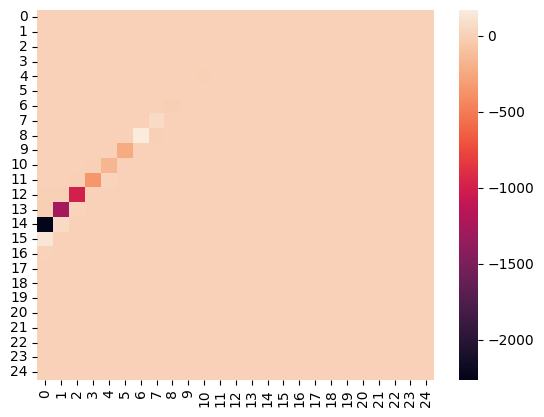

In [26]:
def master(i):
    # master equation evaluated at i'th colocation point
    I = idToCoord(i)
    pc_beta = beta(ug[I[0],I[1]],vg[I[0],I[1]])
    pc_dF = dF(i)
    return pc_beta[0]*pc_dF[0]+pc_beta[1]*pc_dF[1]

plt.figure()
sns.heatmap(np.array([[master(i+nu*j) for i in range(0,nu)] for j in range(0,nv)]))

print(np.max(np.array([[master(i+nu*j) for i in range(0,nu)] for j in range(0,nv)])))

for n in range(0,N_p):
    m = master(n)
    if m >= 100:
        print(f'{idToCoord(n)} -> {m}')



In [14]:
# tune p s.t. all master equations go to 0